<a href="https://colab.research.google.com/github/siddhantkd/cifar10_CNN_Classification/blob/main/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt
import numpy as np

Load Dataset

In [2]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


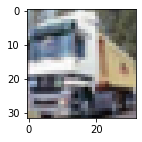

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train = y_train.reshape(-1,)
y_train[0:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)

In [12]:
classification_categories = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classification_categories[y_train[1]]

'truck'

In [22]:
def plotdata(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classification_categories[y[index]])

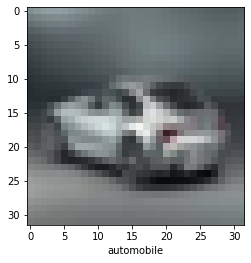

In [29]:
plotdata(x_train,y_train, 250)

Normalizing the Data

In [30]:
x_train = x_train/255.0
x_test = x_test/255.0

CNN model 

In [36]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
                         layers.MaxPooling2D(pool_size=(2,2)),

                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [37]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [38]:
cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4949 - accuracy: 0.4635
Epoch 2/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1181 - accuracy: 0.6079
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9843 - accuracy: 0.6578
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9007 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8330 - accuracy: 0.7109
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7774 - accuracy: 0.7307
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7300 - accuracy: 0.7450
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6853 - accuracy: 0.7625
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6482 - accuracy: 0.7751
Epoch 10/10
1563/1563 [==============================] - 58s 37m

In [40]:
y_pred = cnn.predict(x_test)
y_pred_labels = [np.argmax(i) for i in y_pred]

In [41]:
y_pred_labels[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

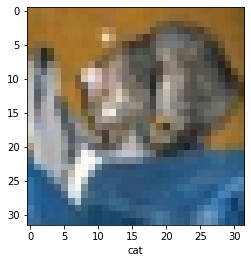

In [50]:
plotdata(x_test,y_test,0)

In [49]:
classification_categories[np.argmax(y_pred[0])]

'cat'

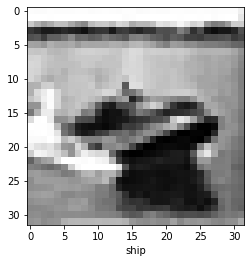

In [51]:
plotdata(x_test,y_test,150)

In [52]:
classification_categories[np.argmax(y_pred[150])]

'ship'